<a href="https://colab.research.google.com/github/tariqrasheed172001/Prediction-of-Depression-levels./blob/main/Model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model building

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv('/content/labeled_dataset.csv')
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Depression
0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,2.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,0.0,1.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,...,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,1
2,0.0,0.0,3.0,3.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0
3,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,3.0,3.0,...,1.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,1.0,2
636,1.0,1.0,1.0,8.0,1.0,3.0,0.0,0.0,2.0,3.0,...,2.0,0.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,2
637,1.0,0.0,2.0,8.0,0.0,3.0,3.0,2.0,3.0,0.0,...,2.0,3.0,0.0,3.0,2.0,2.0,0.0,1.0,3.0,2
638,1.0,0.0,2.0,7.0,1.0,2.0,0.0,0.0,0.0,3.0,...,1.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,2


In [3]:
# If there are missing values, replace them with the mean of the column
imputer = SimpleImputer(strategy='mean')
dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

# Shuffle the dataset
dataset = dataset.sample(frac=1, random_state=20)

kmeans_labels = dataset['Depression']

X = dataset.drop(columns=['Depression'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, kmeans_labels, test_size=0.2, random_state=42)

In [4]:

# Assuming X_train and X_test are your training and testing feature matrices, respectively

# Initialize PCA with desired number of components
n_components = 10  # Adjust this value based on the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "Gaussian SVM": SVC(kernel='rbf'),  # Gaussian SVM
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Bagging": BaggingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_pca, y_train)

    # Predict labels for the test set
    y_pred = clf.predict(X_test_pca)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9141
F1 Score: 0.9095

Naive Bayes:
Accuracy: 0.8125
F1 Score: 0.8104

SVM:
Accuracy: 0.8750
F1 Score: 0.8698

Gaussian SVM:
Accuracy: 0.8750
F1 Score: 0.8698

Decision Tree:
Accuracy: 0.9062
F1 Score: 0.8956

KNN:
Accuracy: 0.8359
F1 Score: 0.8211

Bagging:
Accuracy: 0.8906
F1 Score: 0.8867

Random Forest:
Accuracy: 0.8828
F1 Score: 0.8790



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9141
F1 Score: 0.9145
Confusion Matrix:
[[38  0  0  0  0]
 [ 0 30  3  0  0]
 [ 0  2 45  2  0]
 [ 0  0  1  3  0]
 [ 0  0  0  3  1]]



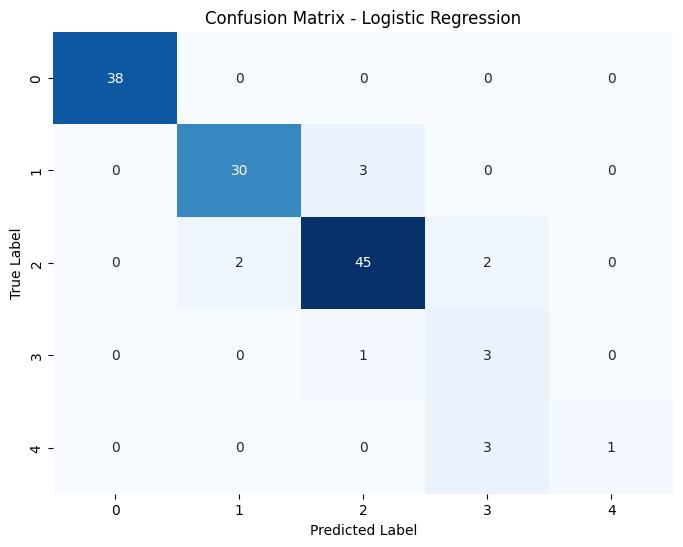

Naive Bayes:
Accuracy: 0.7734
F1 Score: 0.7732
Confusion Matrix:
[[32  6  0  0  0]
 [ 3 23  7  0  0]
 [ 0  8 41  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0  3  1]]



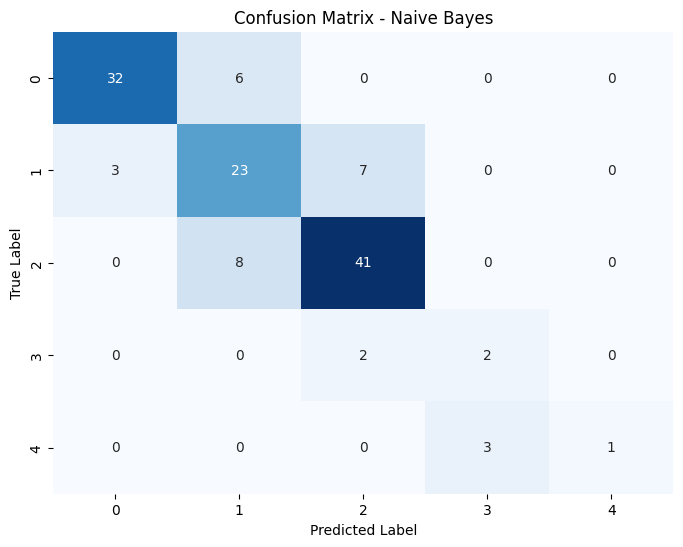

SVM:
Accuracy: 0.8672
F1 Score: 0.8628
Confusion Matrix:
[[35  3  0  0  0]
 [ 0 29  4  0  0]
 [ 0  4 45  0  0]
 [ 0  0  3  1  0]
 [ 0  0  0  3  1]]



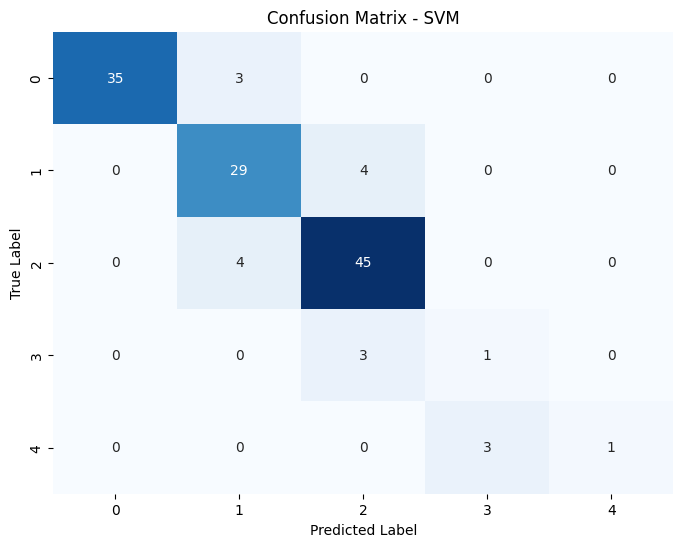

Gaussian SVM:
Accuracy: 0.8672
F1 Score: 0.8628
Confusion Matrix:
[[35  3  0  0  0]
 [ 0 29  4  0  0]
 [ 0  4 45  0  0]
 [ 0  0  3  1  0]
 [ 0  0  0  3  1]]



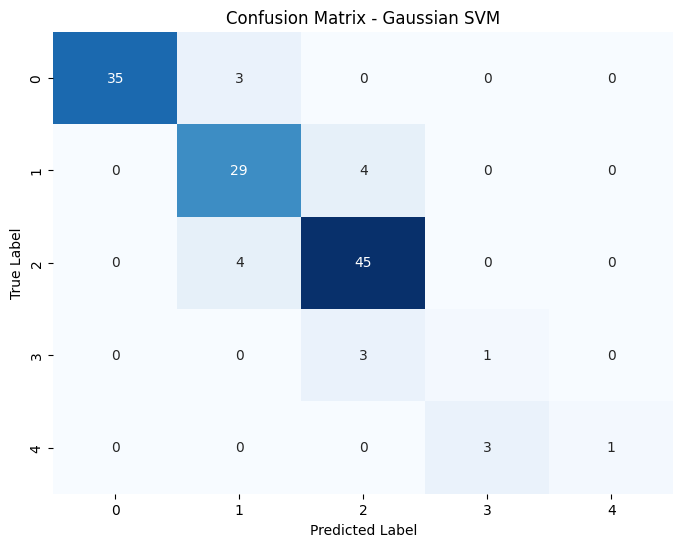

Decision Tree:
Accuracy: 0.6250
F1 Score: 0.6285
Confusion Matrix:
[[22 14  2  0  0]
 [ 3 21  8  1  0]
 [ 0 13 36  0  0]
 [ 0  0  3  1  0]
 [ 0  0  0  4  0]]



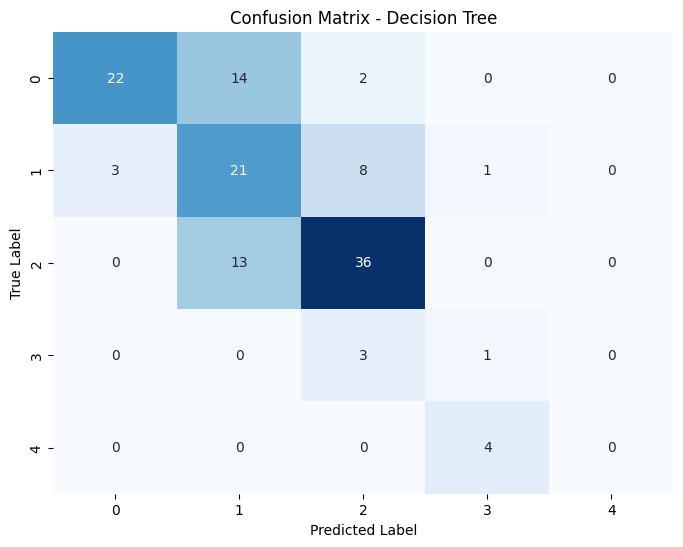

KNN:
Accuracy: 0.7969
F1 Score: 0.7864
Confusion Matrix:
[[37  1  0  0  0]
 [ 7 24  2  0  0]
 [ 0 11 37  1  0]
 [ 0  0  4  0  0]
 [ 0  0  0  0  4]]



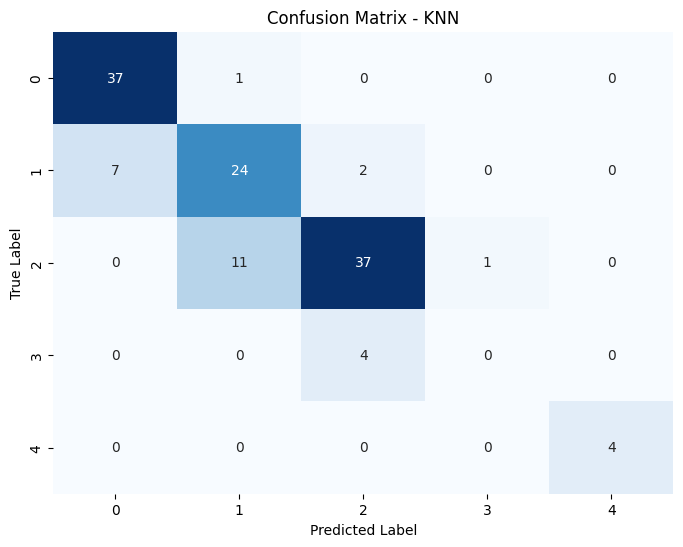

Bagging:
Accuracy: 0.7656
F1 Score: 0.7665
Confusion Matrix:
[[32  6  0  0  0]
 [ 4 23  6  0  0]
 [ 0 10 39  0  0]
 [ 0  0  3  1  0]
 [ 0  0  0  1  3]]



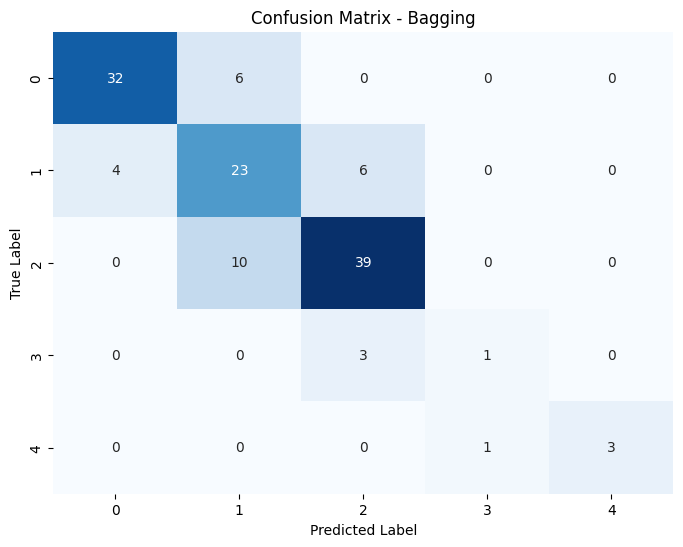

Random Forest:
Accuracy: 0.7891
F1 Score: 0.7775
Confusion Matrix:
[[33  5  0  0  0]
 [ 4 21  8  0  0]
 [ 0  3 46  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  3  1]]



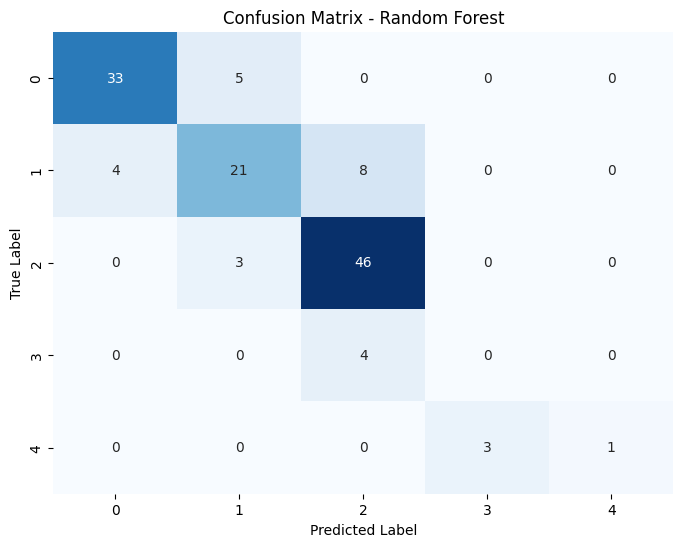

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict labels for the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print results
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize SVC classifier
svm_classifier = SVC(random_state=42)

# Perform grid search
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Update the classifier with the best hyperparameters
svm_classifier_best = SVC(**best_params, random_state=42)

# Train the classifier with the best hyperparameters
svm_classifier_best.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_classifier_best.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Accuracy:", accuracy)
print("F1 Score:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9296875
F1 Score: 0.9362013008266936


In [8]:
from sklearn.decomposition import PCA

# Assuming X_train and X_test are your training and testing feature matrices, respectively

# Initialize PCA with desired number of components
n_components = 10  # Adjust this value based on the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Now X_train_pca and X_test_pca contain the transformed feature matrices with reduced dimensionality
